In [1]:
import numpy as np
import pandas as pd
import glob
import seaborn as sns
sns.set_theme()
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'png')

%matplotlib inline

from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
simplefilter("ignore", ClusterWarning)

In [2]:
def f2(a, b):
    return ((a-b)**2).mean()

In [3]:
def load_P(file):
    df = pd.read_table(file, delimiter = ' ', header = None)
    df.columns = pd.MultiIndex.from_arrays([df.columns],
                                      names=['K'])
    return df

In [4]:
def corr_ks(df):
    df = df.corr(method=f2)
    np.fill_diagonal(df.values, [f2(a, a) for a in np.diag(df)])
    return df

In [5]:
chr7_P = '../results/admixture/chr7_females.pruned.8.P'

In [6]:
df = load_P(chr7_P)
df

K,0,1,2,3,4,5,6,7
0,0.900009,0.863570,0.406284,0.601708,0.815303,0.999990,0.907663,0.944452
1,0.600007,0.503130,0.473269,0.632120,0.455935,0.499999,0.460068,0.507790
2,0.999990,0.941895,0.722598,0.842163,0.999990,0.999990,0.931975,0.901928
3,0.999990,0.999990,0.999990,0.973822,0.999990,0.999990,0.999990,0.999990
4,0.999990,0.939689,0.999990,0.999990,0.999990,0.999990,0.999990,0.999990
...,...,...,...,...,...,...,...,...
1021232,0.999990,0.878709,0.999990,0.999990,0.999990,0.999990,0.999990,0.951006
1021233,0.999990,0.816976,0.999990,0.740612,0.999990,0.999990,0.999990,0.999990
1021234,0.999990,0.999990,0.999990,0.888635,0.999990,0.999990,0.999990,0.999990
1021235,0.999990,0.999990,0.999990,0.999990,0.864305,0.999990,0.981120,0.826899


In [7]:
df_corr = corr_ks(df)
df_corr

K,0,1,2,3,4,5,6,7
K,,,,,,,,
0,0.000000,0.042252,0.045544,0.039720,0.038139,0.057433,0.033304,0.034698
1,0.042252,0.000000,0.020686,0.017320,0.041934,0.058853,0.036602,0.041232
2,0.045544,0.020686,0.000000,0.018942,0.044085,0.061830,0.038889,0.043747
3,0.039720,0.017320,0.018942,0.000000,0.038596,0.055951,0.033165,0.038141
4,0.038139,0.041934,0.044085,0.038596,0.000000,0.042987,0.010500,0.014027
5,0.057433,0.058853,0.061830,0.055951,0.042987,0.000000,0.041103,0.042846
6,0.033304,0.036602,0.038889,0.033165,0.010500,0.041103,0.000000,0.012824
7,0.034698,0.041232,0.043747,0.038141,0.014027,0.042846,0.012824,0.000000


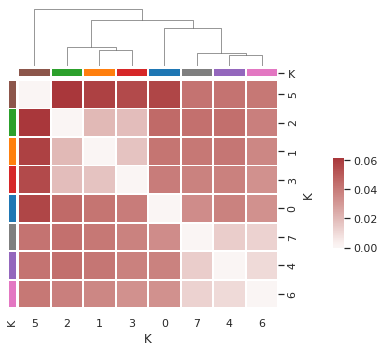

In [8]:
clusters = df_corr.columns.get_level_values("K")
pal = sns.color_palette("tab10")
color_mapping = dict(zip(clusters, pal))
cluster_colors = pd.Series(clusters, index=df_corr.columns).map(color_mapping)

g = sns.clustermap(df_corr, center=0, cmap="vlag",
                   row_colors=cluster_colors, col_colors=cluster_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(1.02, .3, .03, .25),
                   linewidths=.75, figsize=(5, 5))

g.ax_row_dendrogram.remove()